# oloeriu bogdan: Advanced Lane Finding

do the necessery imports for the project

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

#this is my Camera class. 


In [2]:
class Camera():

    #it creates an calibrated camera object
    def __init__(self):
        self.ret = None
        self.mtx = None
        self.dist = None
        self.rvecs = None
        self.tvecs = None
        self.imageSize = None

        #print ("hello from init function")

        # Read in a calibration image
        images  = glob.glob('./camera_cal/calibration*.jpg')
        #print("images ok")
        #plt.imshow(img)
        #plt.show()

        # Arrays to store object points and image points from all the images
        objpoints = [] #3D points in real world space
        imgpoints = [] #2d points in image plane

        # Prepare oject points, like (0,0,0), (1,0,0), (2,0,0) ...., (7,5,0)
        objp = np.zeros((6*9, 3), np.float32)
        objp[:,:2]  = np.mgrid[0:9, 0:6].T.reshape(-1,2) #x, y coordinates

        for fname in images:
            # read in each image

            img = mpimg.imread(fname)

            # Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            #set the size
            if self.imageSize is None:
                self.imageSize = gray.shape[::-1]

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
            # If corners are found, add object points, image points
            if ret == True:
                imgpoints.append(corners)
                objpoints.append(objp)

                # draw and sisplay the corners
                img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
                #plt.imshow(img)
                #plt.show()

                # calibrate camera for this image
                #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
                #undistorted = cv2.undistort(img, mtx, dist, None, mtx)
                #plt.imshow(undistorted)
                #plt.show()
            #else:
                #print ("Corners not found", fname)

        #calibrate camera
        self.ret, self.mtx, self.dist, self.rvecs, self.tvecs = cv2.calibrateCamera(objpoints, imgpoints, self.imageSize, None, None)

    #it uses cv2 to undistor camera
    def undistort(self, img):
        undistorted = cv2.undistort(img, self.mtx, self.dist, None, self.mtx)
        return undistorted

create a calibrated camera object and undistort an immage

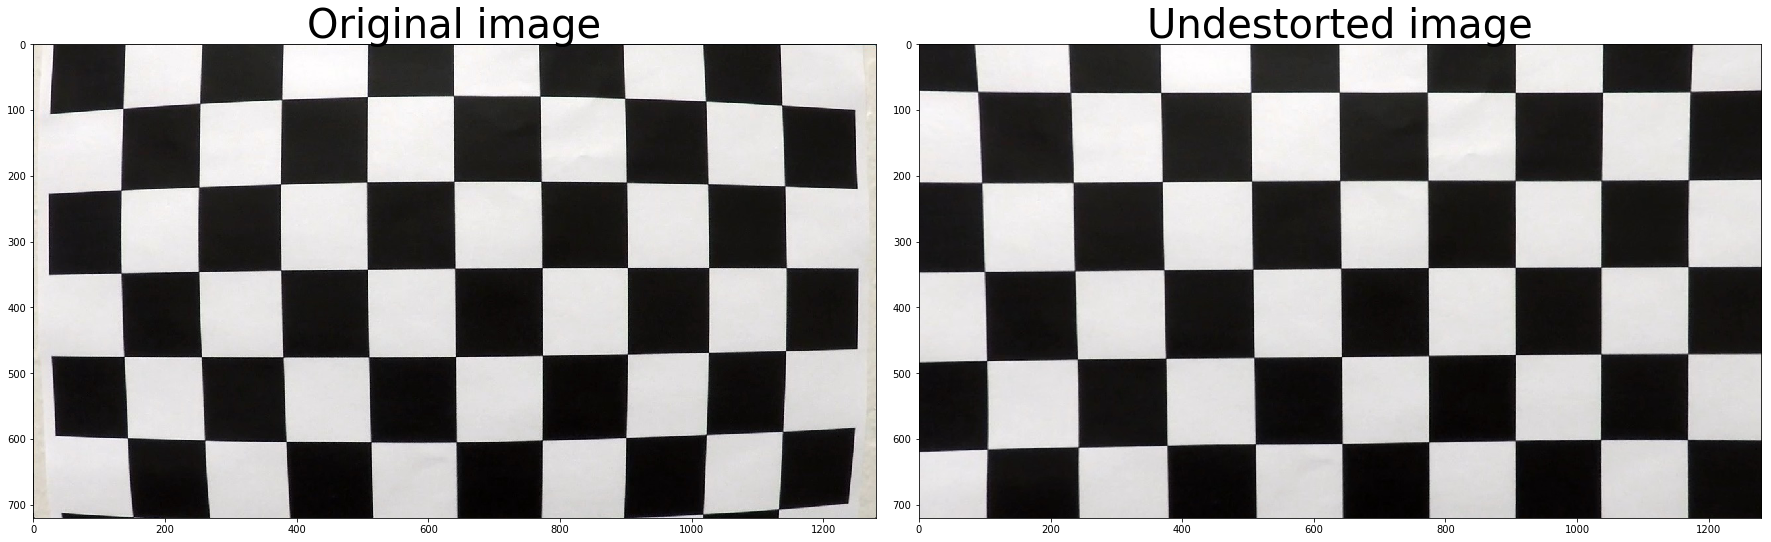

In [5]:

img = mpimg.imread('./camera_cal/calibration1.jpg')

my_camera = Camera()
undestorted_test = my_camera.undistort(img)
#plt.imshow(undestorted_test)
#plt.imshow(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()


ax1.imshow(img)
ax1.set_title('Original image', fontsize=40)

ax2.imshow(undestorted_test)
ax2.set_title('Undestorted image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()